<a href="https://colab.research.google.com/github/1900690/kyouyu/blob/main/%E3%83%9E%E3%82%B9%E3%82%AF%E7%94%BB%E5%83%8F%E3%81%8B%E3%82%89%E3%82%A2%E3%83%8E%E3%83%86%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%E4%BD%9C%E6%88%90.12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#指示書
###★ダニのアノテーションははっきりと黒い星が見える物のみ印をつける★
アノテーションを行って保存する
*   ドライブをマウント
*   segmentation-reaf.csv、boundhingbox-reaf-mite.csvをダウンロード（エクセルが入ってない場合はcsvをtxt化して扱う。txtはエクセルが使える時にcsv化する【スペース区切りは列がずれるのでダメ】）
*   動画からフレーム指定して画像を切り取り、ダウンロード
*   画像をremovebgにかけ背景消去、背景消去済みのpngをアップロードして大きく引き伸ばしマスクとカラーを作成。
*   FastLabelのセグメンテーションとバウンディングボックス両方に一枚ずつjpgをアップロード、葉の輪郭のboundhingboxとsegmentaionはインポートする。ダニのboundhingboxは自分でつける
*   両方のcsvをエクスポートしてcsvの中身をデータをsegmentation-reaf.csvとboundhingbox-reaf-mite.csvに追加
*   アノテーションが終わった画像をcolab内でfastlabel済み画像に移動
*   作業終了時にsegmentation-reaf.csv、boundhingbox-reaf-mite.csvをドライブにアップロード

（FastLabelの画像がいっぱいになったら消す。復活させる場合はドライブから画像とboundhingbox-reaf-mite.csvをインポートさせる）

##※グーグルドライブをマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##※ドライブの動画フォルダからまとめて画像フレームを切り取りsliceフォルダに保存
https://note.nkmk.me/python-opencv-video-to-still-image/

In [ ]:
import cv2
import os

def save_frame_range(video_path,
                     dir_path, ext='jpg'):
  
    basename=video_path[-12:-4]
    cap = cv2.VideoCapture(video_path)
    
    # 総フレーム数
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT));

    #真ん中+1のフレームを取り出すプラスの数値を調整することでフレームをずらせる
    center_frame=total_frames//2+40
    start_frame=center_frame
    stop_frame=total_frames
    step_frame=center_frame

    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

    for n in range(start_frame, stop_frame, step_frame):
        cap.set(cv2.CAP_PROP_POS_FRAMES, n)
        ret, frame = cap.read()
        if ret:
            cv2.imwrite('{}_{}.{}'.format(base_path, str(n).zfill(digit), ext), frame)
        else:
            return

#スライスフォルダを作成
SAVE_NAME = 'slice'
if not os.path.exists('./' +SAVE_NAME):
    os.mkdir('./' +SAVE_NAME)

LOAD_FOLDA = '/content/drive/MyDrive/バラ画像/ダニ動画/20220823'
LOAD_NAME = os.listdir(LOAD_FOLDA)


for file_name in LOAD_NAME:
  IMAGE_PATH= LOAD_FOLDA +'/'+file_name
  save_frame_range(IMAGE_PATH,
                 '/content/'+SAVE_NAME)
  
image_date=LOAD_FOLDA[-8:]


##※フォルダ作成

In [ ]:
#参考https://kino-code.com/files-move/
import os
import shutil
#作成するフォルダネーム
file_extensions = ['remove','png','jpg']

#拡張子リストを取得するフォー文を追加する。
for file_extension in file_extensions:
  if not os.path.exists(file_extension):
    os.mkdir(file_extension)

##※sliceフォルダを圧縮してダウンロードする

In [ ]:
#画像をまとめてダウンロード
from google.colab import files
import shutil

shutil.make_archive('slice', format='zip', root_dir='/content/slice')

files.download('slice.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##※画像を背景消去してremoveフォルダにアップロード
背景消去はadobeで大まかに消し、removebgで細かく消すのが早い

[adobe](https://www.adobe.com/jp/express/feature/image/remove-background)

[remove.bg](https://www.remove.bg/ja)

※removeフォルダの画像を引き延ばしpngへ保存

In [ ]:
from PIL import Image

read_files = os.listdir('/content/remove')

for file_name in read_files:
  img = Image.open('/content/remove/'+file_name)
  rename=file_name[:-21]
  if img.size[0]<img.size[1]:
    img_resize_lanczos = img.resize((1080, 1920), Image.LANCZOS)
  else:
    img_resize_lanczos = img.resize((1920,1080 ), Image.LANCZOS)
  if len(file_name)>16:
    img_resize_lanczos.save('/content/png/'+rename+'.png')
  else:
    img_resize_lanczos.save('/content/png/'+file_name)

##※pngに保存した画像と同じものをsliceからjpgに移動

In [ ]:
import os
import shutil

read_files = os.listdir('/content/png')

#read_listから、指定の拡張子のファイルだけ指定のディレクトリにコピーする
for file_name in read_files:
  rename=file_name[:-3]
  copy_from = '/content/slice/' + rename+'jpg'    
  copy_to = '/content/jpg/' + rename +'jpg'
  shutil.copy2(copy_from, copy_to)

##※pngフォルダから白黒画像を取得しmaskフォルダに保存

In [ ]:
import cv2
from matplotlib import pyplot as plt
import glob

#.ipynb_checkpointsを消去
!cd '/content/png'
!rm -rf `find -type d -name .ipynb_checkpoints`
!cd '/content'

#二値化の閾値
threshold_value = 127

#jpgフォルダのリストを取得
LOAD_FOLDA = 'png'
LOAD_NAME = os.listdir(LOAD_FOLDA)


#マスクフォルダを作成
SAVE_NAME = 'mask'
if not os.path.exists('./' +SAVE_NAME):
    os.mkdir('./' +SAVE_NAME)

#マスク画像を作るためのfor文
for file_name in LOAD_NAME:

  IMAGE_PATH='/content/' + LOAD_FOLDA +'/'+file_name
  image = cv2.imread(IMAGE_PATH, cv2.IMREAD_UNCHANGED)# 画像を読み込んでNumPy配列を作成
  alpha_image = image[:,:,3]# スライスを利用してアルファチャンネルのみを切り出し
  ret, threshold_img = cv2.threshold(alpha_image, threshold_value, 255, cv2.THRESH_BINARY) #黒白二値化
  cv2.imwrite('/content/'+SAVE_NAME+'/'+file_name, threshold_img)# 画像ファイルとして保存

#マスク画像の名前を置き換えるためのfor文
FILE_PASS=glob.glob('/content/mask/*')

for name in FILE_PASS:
  #nameの名前をRENAMEへ変更
  RENAME=name.replace('-removebg-preview', '')
  os.rename(name, RENAME)

/bin/bash: line 0: cd: /comtent: No such file or directory


##※maskフォルダの画像をインデックスカラー化

In [ ]:
import cv2
from matplotlib import pyplot as plt
import glob

color_list = [(255,0,0),(255,0,0),(255,0,0),(255,0,0),(255,0,0),(255,0,0),(255,0,0)]


#maskフォルダのリストを取得
LOAD_FOLDA = 'mask'
LOAD_NAME = os.listdir(LOAD_FOLDA)


#colerを作成
SAVE_NAME = 'coler'
if not os.path.exists('./' +SAVE_NAME):
    os.mkdir('./' +SAVE_NAME)

#coler画像を作るためのfor文
for file_name in LOAD_NAME:
  im = cv2.imread('/content/'+LOAD_FOLDA+'/'+file_name,flags=cv2.IMREAD_GRAYSCALE)
  contours, hierarchy = cv2.findContours(im,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  img2 = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
  for i in range(len(contours)):
      cnt = contours[i]
      img2 = cv2.drawContours(img2, [cnt], 0, color_list[i], -1)
  arfa_image = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  
  cv2.imwrite('/content/'+SAVE_NAME+'/'+file_name, arfa_image)# 画像ファイルとして保存

#カラーコードをHEX形式でtxtに出力
#fname = '/content/'+SAVE_NAME+'/'+'coler_code.txt'
#f = open(fname,'w')
#for i in color_list:
#  html_color='#%02X%02X%02X' % i+"\n"
#  f.write(html_color)
#f.close()

##※maskからバウンディングボックスを取得

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#'NoneType' object is not subscriptableといわれるので先にipynb_checkpointsを消す
!rm -rf `find -type d -name .ipynb_checkpoints`

#maskフォルダのリストを取得
LOAD_FOLDA = 'mask'
LOAD_NAME = os.listdir(LOAD_FOLDA)
#ヘッダ作成
import csv
data = [["Name","Type","Value","x1","y1","x2","y2","Attributes"],]
with open("csvfile2.csv", "w") as file:
        writer = csv.writer(file)
        writer.writerows(data)

#csvに書き込むときは、行列を作って一気に書き込んだほうが処理が速い
for file_name in LOAD_NAME:
  #Nameを修正
  Name=file_name[:-4]+".jpg"

  mask_indexes = np.where(cv2.imread('/content/'+LOAD_FOLDA+'/'+file_name)[:,:,0]>0)
  y_min = np.min(mask_indexes[0])
  y_max = np.max(mask_indexes[0])
  x_min = np.min(mask_indexes[1])
  x_max = np.max(mask_indexes[1])
  list=[[Name,"bbox","reaf",x_min,y_min,x_max,y_max,""]]
  
  with open("csvfile2.csv",mode="a", newline="") as file:
        writer = csv.writer(file)
        writer.writerows(list)

##※fastlabelに必要なものを圧縮してダウンロード




In [ ]:
from google.colab import files
import shutil

shutil.make_archive('jpg', format='zip', root_dir='/content/jpg')
shutil.make_archive('coler', format='zip', root_dir='/content/coler')

files.download('csvfile2.csv')
files.download('jpg.zip')
files.download('coler.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##※編集したデータをエクセルに記録

In [ ]:
#記録する内容のかぶりを消去
import shutil
import glob

#移動元と移動先のフォルダを定義する。
input_path = "/content/slice"
output_path = "/content/coler"

#フォルダのリストを取得
LOAD_FOLDA = 'jpg'
LOAD_NAME = os.listdir(LOAD_FOLDA)

for file_name in LOAD_NAME:
  #移動用ファイルリストを作成
  move_file_list = glob.glob(input_path +"/"+ file_name)

  #リストの要素を一つずつ取り出して移動させていく。かぶったファイルは消える
  for item in move_file_list:
    shutil.move(item, output_path)

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#'NoneType' object is not subscriptableといわれるので先にipynb_checkpointsを消す
!rm -rf `find -type d -name .ipynb_checkpoints`

#jpgフォルダのリストを取得
LOAD_FOLDA = 'jpg'
LOAD_NAME = os.listdir(LOAD_FOLDA)
#ヘッダ作成
import csv

if not os.path.exists('/content/drive/MyDrive/バラ画像/image-data.csv'):
  data = [["Video-name","Image-name","date"],]
  with open("/content/drive/MyDrive/バラ画像/image-data.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(data)

#csvに書き込むときは、行列を作って一気に書き込んだほうが処理が速い
for file_name in LOAD_NAME:
  #Nameを修正
  videoname=file_name[:-8]+".mp4"
  imagename=file_name

  list=[[videoname,imagename,image_date]]
  with open("/content/drive/MyDrive/バラ画像/image-data.csv",mode="a", newline="") as file:
        writer = csv.writer(file)
        writer.writerows(list)

##※出力が終わったものを消す

In [ ]:
#coler,jpg,mask,png,removeを消去
shutil.rmtree('/content/coler')
shutil.rmtree('/content/jpg')
shutil.rmtree('/content/mask')
shutil.rmtree('/content/png')
shutil.rmtree('/content/remove')
os.remove('/content/coler.zip')
os.remove('/content/csvfile2.csv')
os.remove('/content/jpg.zip')
os.remove('/content/slice.zip')

##※背景合成

In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageFilter
#背景合成のためにはpng,jpgフォルダが必要

img1 = cv2.imread('/content/MOV_0297_127.jpg')#合成する葉の画像
img2 = cv2.imread('/content/drive/MyDrive/バラ画像/background_image/DSC_0225.jpg')#合成する背景の画像
img3 = np.array(Image.open('/content/MOV_0297_127.png'))#葉の画像のマスク

#アルファ情報をスライス
#ALPHA = np.array(img3[:, :, 3], dtype=np.int16)
#ALPHAtest = np.array(img3[:, :, 3], dtype=np.int16)
ALPHA =np.array(img3, dtype=np.int16)
ALPHAtest = np.array(img3, dtype=np.int16)

#掛け算のために0->1に置き換えし逆転したアルファ画像を作る
ALPHA=np.where(ALPHA<144, 0, 1)
ALPHA_INV=np.where(ALPHA==0, 1, 0)
#retval,r2 = cv2.threshold(r, 0, 255, cv2.THRESH_BINARY)#二値化
#r= cv2.blur(r,(6, 6))#ぼかす


#マスクに合わせて掛け算
for i in list(range(3)):
  img1[:,:,i]=ALPHA*img1[:,:,i]
  img2[:,:,i]=ALPHA_INV*img2[:,:,i]

#足し算で合成
img=img1+img2

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

cv2.imwrite('/content/new.jpg', img)
#np.savetxt('/content/ALPHAtest.txt',ALPHAtest,fmt='%d')

ValueError: ignored

##※画像分割（フォルダの中の画像をN分割してフォルダを作成して保存）

In [19]:
import cv2
import numpy as np
import os

#★画像を分割して保存
#画像の読み込み

read_files = os.listdir('/content/mask')

for file_name in read_files:
  fname = "/content/mask/"+file_name #画像ファイル名
  foldaname=fname[9:]

  img=cv2.imread(fname,cv2.IMREAD_COLOR)
  #画像分割先のフォルダを作成
  if not os.path.exists('/content/split_pic/'+file_name[:-4]):
    os.makedirs('/content/split_pic/'+file_name[:-4])

  h,w=img.shape[:2]
  #分割数
  split_x=4
  split_y=4
  #画像の分割処理
  cx=0
  cy=0
  for j in range(split_x):
    for i in range(split_y):
      split_pic=img[cy:cy+int(h/split_y),cx:cx+int(w/split_x),:]
      cv2.imwrite("/content/split_pic/"+file_name[:-4]+"/"+file_name[:-4]+'split_y'+str(i)+'_x'+str(j)+foldaname[-4:],split_pic)
      cy=cy+int(h/split_y)
    cy=0
    cx=cx+int(w/split_x)

  #%cd "/content"
  #★分割する線を描いた画像を出力
  y_step=int(h/split_y) #縦の分割間隔
  x_step=int(w/split_x) #横の分割間隔

  #オブジェクトimgのshapeメソッドの1つ目の戻り値(画像の高さ)をimg_yに、2つ目の戻り値(画像の幅)をimg_xに
  img_y,img_x=img.shape[:2]  

  #横線を引く：y_stepからimg_yの手前までy_stepおきに白い(BGRすべて255)横線を引く
  img[y_step:img_y:y_step, :, :] = 255
  #縦線を引く：x_stepからimg_xの手前までx_stepおきに白い(BGRすべて255)縦線を引く
  img[:, x_step:img_x:x_step, :] = 255

  cv2.imwrite("/content/split_pic/"+file_name[:-4]+"/agrid"+foldaname[-4:],img) #ファイル名'grid.png'でimgを保存

##※画像の位置情報をCSV化
[自前のMask画像からCOCO format jsonを作成](https://salt22g.hatenablog.jp/entry/2020/12/20/210419)

In [ ]:
#★切り取り消去用道具★
import shutil
shutil.rmtree('/content/split_pic')
#%mkdir "/content/drive/MyDrive/yolov7/dataset/mite/train/images"

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from skimage import measure

#画像読み込み
fname='/content/DSC_0299.png'
im = np.array(Image.open(fname))
NAME=fname[9:-4]+".png"
#分ける
contours = measure.find_contours(im, 0.0)

import csv
data = [["Name","Type","Value","x1","y1","x2","y2","Attributes"],]
with open("csvfile2.csv", "w") as file:
        writer = csv.writer(file)
        writer.writerows(data)

#csvに書き込むときは、行列を作って一気に書き込んだほうが処理が速い
for number in list(range(len(contours))):

  y_min = int(np.amin(contours[number],axis=0)[0])
  y_max = int(np.amax(contours[number],axis=0)[0])
  x_min = int(np.amin(contours[number],axis=0)[1])
  x_max = int(np.amax(contours[number],axis=0)[1])
  data=[[NAME,"bbox","mite",x_min,y_min,x_max,y_max,""]]
  
  with open("csvfile2.csv",mode="a", newline="") as file:
        writer = csv.writer(file)
        writer.writerows(data)

※境目部分を処理（大きいほうのバウンディングボックスを採用する）

#ここからは無修正

In [ ]:
import shutil
shutil.copyfile("/content/drive/MyDrive/バラ画像/roze-reaf-rinkaku-resize.zip", "/content/roze-reaf-rinkaku-resize.zip")
shutil.copyfile("/content/drive/MyDrive/バラ画像/semantic_segmentations.zip", "/content/semantic_segmentations.zip")

!unzip -q roze-reaf-rinkaku-resize.zip
!unzip -q semantic_segmentations.zip

※まとめてリネーム

In [ ]:
import glob
import os
 
# ファイルを取得する
path = '/content/葉の輪郭用/*'
i = 1
 
# ファイルリストを取得する
flist = glob.glob(path)
print('変更前')
print(flist)
 
# ファイル名を一括で変更する
for file in flist:
  os.rename(file, '/content/葉の輪郭用/' + str(i) + '.jpg')
  i+=1
 
list = glob.glob(path)
print('変更後')
print(list)

変更前
['/content/葉の輪郭用/DSC_0213.jpg のコピー', '/content/葉の輪郭用/DSC_0209.jpg のコピー', '/content/葉の輪郭用/DSC_0032.jpg のコピー', '/content/葉の輪郭用/DSC_0261.jpg のコピー', '/content/葉の輪郭用/DSC_0250.jpg のコピー', '/content/葉の輪郭用/IMG_20220310_111627.jpg のコピー', '/content/葉の輪郭用/IMG_20220310_111329.jpg のコピー', '/content/葉の輪郭用/DSC_0024.jpg のコピー', '/content/葉の輪郭用/DSC_0036.jpg のコピー', '/content/葉の輪郭用/DSC_0212.jpg のコピー', '/content/葉の輪郭用/DSC_0211.jpg のコピー', '/content/葉の輪郭用/IMG_20220310_111725.jpg のコピー', '/content/葉の輪郭用/DSC_0021.jpg のコピー', '/content/葉の輪郭用/DSC_0031.jpg のコピー', '/content/葉の輪郭用/DSC_0223.jpg のコピー', '/content/葉の輪郭用/DSC_0249.jpg のコピー', '/content/葉の輪郭用/DSC_0248.jpg のコピー', '/content/葉の輪郭用/IMG_20220310_110713.jpg のコピー', '/content/葉の輪郭用/DSC_0033.jpg のコピー', '/content/葉の輪郭用/IMG_20220330_102929.jpg のコピー', '/content/葉の輪郭用/DSC_0243.jpg のコピー', '/content/葉の輪郭用/IMG_20220310_111743.jpg のコピー', '/content/葉の輪郭用/DSC_0241.jpg のコピー', '/content/葉の輪郭用/DSC_0245.jpg のコピー', '/content/葉の輪郭用/DSC_0016.jpg のコピー', '/co

※画像は433＊577or577＊433に合わせておく

In [ ]:
!pip install Pillow
import os
from PIL import Image
from google.colab import drive,files

%cd /content
!mkdir 葉の輪郭用resize

dir_name = "/content/葉の輪郭用"
new_dir_name = "/content/葉の輪郭用resize"
files = os.listdir(dir_name)

for file in files:
    photo = Image.open(os.path.join(dir_name, file))
    if photo.size[0] == 3120:
      photo_resize = photo.resize((433,577))
    else:
      photo_resize = photo.resize((577,433))
    photo_resize.save(os.path.join(new_dir_name, file))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content
mkdir: cannot create directory ‘葉の輪郭用resize’: File exists


※フォルダを圧縮

In [ ]:
!cd "/content" && zip -q "coler.zip" -r "coler"


zip error: Nothing to do! (try: zip -q -r coler.zip . -i coler)


#背景処理画像を作成
[remobe.bg](https://www.remove.bg/ja)にアクセスして、背景消去した画像を作成する

※フォルダには生画像、背景処理画像をセットで入れておく

##ローカルから画像を入手する場合

画像の入ったフォルダをzip化(日本語は文字化けする)、ダウンロードののち、以下のコードで解凍

In [ ]:
!unzip -q roze-reaf-rinkaku-resize.zip

#画像の仕分け

画像のリストを取得し、生画像、背景処理画像それぞれのフォルダに入れるプログラム

In [ ]:
#参考https://kino-code.com/files-move/
import os
import shutil
#作成するフォルダネーム
file_extensions = ['jpg','png']
file_extensions 

#読み取りたいディレクトリパスを入れる
read_path = 'roze-reaf-rinkaku-resize'#★読み取るフォルダネームに合わせて変更
read_files = os.listdir(read_path)

#拡張子リストを取得するフォー文を追加する。
for file_extension in file_extensions:
  if not os.path.exists(file_extension):
    os.mkdir(file_extension)

  #指定の拡張子だけのファイル名をリストを作る
  file_list = []
  for file_name in read_files:
      if file_name.endswith(file_extension):
          file_list.append(file_name)

  #read_listから、指定の拡張子のファイルだけ指定のディレクトリにコピーする
  for file_name in file_list:
      copy_from = './' + read_path + '/' + file_name    
      copy_to = './' + file_extension + '/' + file_name 
      shutil.copy2(copy_from, copy_to)

#マスク画像を取得

jpgフォルダには元の画像を、maskフォルダにはマスク画像を入れる。それぞれのセットごとに同じ名前を付けること

アルファチャンネル（透過度）のみ取得

In [ ]:
import cv2
from matplotlib import pyplot as plt
import glob

#jpgフォルダのリストを取得
LOAD_FOLDA = 'png'
LOAD_NAME = os.listdir(LOAD_FOLDA)


#マスクフォルダを作成
SAVE_NAME = 'mask'
if not os.path.exists('./' +SAVE_NAME):
    os.mkdir('./' +SAVE_NAME)

#マスク画像を作るためのfor文
for file_name in LOAD_NAME:

  IMAGE_PATH='/content/' + LOAD_FOLDA +'/'+file_name
  image = cv2.imread(IMAGE_PATH, cv2.IMREAD_UNCHANGED)# 画像を読み込んでNumPy配列を作成
  alpha_image = image[:,:,3]# スライスを利用してアルファチャンネルのみを切り出し
  cv2.imwrite('/content/'+SAVE_NAME+'/'+file_name, alpha_image)# 画像ファイルとして保存

#マスク画像の名前を置き換えるためのfor文
FILE_PASS=glob.glob('/content/mask/*')

for name in FILE_PASS:
  #nameの名前をRENAMEへ変更
  RENAME=name.replace('-removebg-preview', '')
  os.rename(name, RENAME)

#カラー画像を取得

In [ ]:
import cv2
from matplotlib import pyplot as plt
import glob

color_list = [(255,0,0),(0,255,0),(0,0,255),(255,255,0),(0,255,255),(255,255,255)]


#maskフォルダのリストを取得
LOAD_FOLDA = 'mask'
LOAD_NAME = os.listdir(LOAD_FOLDA)


#colerを作成
SAVE_NAME = 'coler'
if not os.path.exists('./' +SAVE_NAME):
    os.mkdir('./' +SAVE_NAME)

#coler画像を作るためのfor文
for file_name in LOAD_NAME:
  im = cv2.imread('/content/'+LOAD_FOLDA+'/'+file_name,flags=cv2.IMREAD_GRAYSCALE)
  contours, hierarchy = cv2.findContours(im,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

  img2 = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
  for i in range(len(contours)):
      cnt = contours[i]
      img2 = cv2.drawContours(img2, [cnt], 0, color_list[i], -1)
  arfa_image = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  
  cv2.imwrite('/content/'+SAVE_NAME+'/'+file_name, arfa_image)# 画像ファイルとして保存

#カラーコードをHEX形式でtxtに出力
fname = '/content/'+SAVE_NAME+'/'+'coler_code.txt'
f = open(fname,'w')
for i in color_list:
  html_color='#%02X%02X%02X' % i+"\n"
  f.write(html_color)
f.close()

##読み込んだ画像を表示する場合

・OpenCVを使って画像を読み込む cv2.imreadでOpenCV形式に変換 OpenCVはBGRなのでcvtColorでRGBに直してから表示する

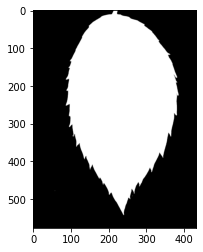

In [ ]:
import cv2
from matplotlib import pyplot as plt
image_name='/content/mask/1.png'
orig = cv2.imread(image_name)
src = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(src)

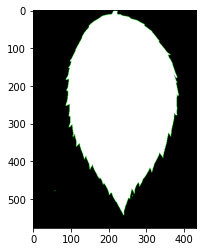

In [ ]:
im = cv2.imread(image_name,flags=cv2.IMREAD_GRAYSCALE)
contours, hierarchy = cv2.findContours(im,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
#drawContoursの最後の引数で輪郭描画線の太さが指定できる。
img = cv2.drawContours(img, contours, -1, (0,255,0), 1)
plt.imshow(img)
plt.show()

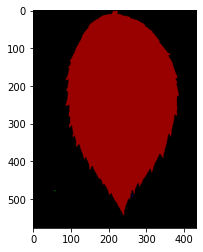

True

In [ ]:
img2 = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
color_list = [(255,0,0),(0,255,0),(0,0,153),(0,0,204),(0,0,255)]

for i in range(len(contours)):
    cnt = contours[i]
    img2 = cv2.drawContours(img2, [cnt], 0, color_list[i], -1)
arfa_image = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(arfa_image)
plt.show()
#cv2.imwrite(image_name, arfa_image)# 画像ファイルとして保存

#CSVでバウンディングボックスのアノテーションデータを出力



In [ ]:
#csvに書き込むときは、行列を作って一気に書き込んだほうが処理が速い
mask_indexes = np.where(cv2.imread(image_name)[:,:,0]>0)
y_min = np.min(mask_indexes[0])
y_max = np.max(mask_indexes[0])
x_min = np.min(mask_indexes[1])
x_max = np.max(mask_indexes[1])


#JSON(coco)形式でインスタンスセグメンテーションのアノテーションデータを出力

ライブラリインポート

In [ ]:
import json
import collections as cl
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure
from skimage.segmentation import clear_border
from skimage.filters import threshold_otsu
import cv2
import glob
import sys
import os

関数定義

問題点

*複数枚の葉が写った画像に対応させる必要がある

##※roboflow形式

In [ ]:
### https://qiita.com/harmegiddo/items/da131ae5bcddbbbde41f

def info():
    tmp = cl.OrderedDict()
    tmp["year"] = "2022"
    tmp["version"] = "1"
    tmp["description"] = "Exported from roboflow.ai"
    tmp["contributor"] = ""
    tmp["url"] ="https://public.roboflow.ai/object-detection/undefined"
    tmp["data_created"] = "2022"
    return tmp

def licenses():
    tmp = cl.OrderedDict()
    tmp["id"] = 1
    tmp["url"] = "https://creativecommons.org/licenses/by/4.0/"
    tmp["name"] = "CC BY 4.0"
    return tmp

def categories():
    tmps = []
    sup = ["none","reaf","reaf","reaf","reaf","reaf"]
    cat = ["reaf","reaf1","reaf2","reaf3","reaf4","reaf5"]

    for i in range(len(sup)):
        tmp = cl.OrderedDict()
        tmp["id"] = i
        tmp["name"] = cat[i]
        tmp["supercategory"] = sup[i]
        tmps.append(tmp)
    return tmps

def images(mask_path):
    tmps = []
    files = glob.glob(mask_path + "/*.png")
    files.sort()

    for i, file in enumerate(files):
        img = cv2.imread(file, 0)
        height, width = img.shape[:3]

        tmp = cl.OrderedDict()
        tmp["id"] = i
        tmp["license"] = 1
        tmp["file_name"] = os.path.basename(file.replace('png', 'jpg'))
        tmp["height"] = height
        tmp["width"] = width
        tmp["date_captured"] = ""
        tmps.append(tmp)
    return tmps


def annotations(mask_path):
    tmps = []

    files = glob.glob(mask_path + "/*.png")
    files.sort()
    
    for i, file in enumerate(files):
        img = cv2.imread(file, 0)
        tmp = cl.OrderedDict()
        contours = measure.find_contours(img, 0.5)
        segmentation_list = []

        for contour in contours:
            for a in contour:
                segmentation_list.append(a[1])
                segmentation_list.append(a[0])


        mask = np.array(img)
        obj_ids = np.unique(mask)
        obj_ids = obj_ids[1:]
        masks = mask == obj_ids[:, None, None]
        num_objs = len(obj_ids)
        boxes = []

        for j in range(num_objs):
            pos = np.where(masks[j])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        tmp_segmentation = cl.OrderedDict()

        tmp["id"] = i
        tmp["image_id"] = i
        tmp["category_id"] = 1
        tmp["bbox"] =  [float(boxes[0][0]), float(boxes[0][1]), float(boxes[0][3] - boxes[0][1]), float(boxes[0][2] - boxes[0][0])]
        tmp["area"] = float(boxes[0][3] - boxes[0][1]) * float(boxes[0][2] - boxes[0][0])
        tmp["segmentation"] = [segmentation_list]
        tmp["iscrowd"] = 0        
        tmps.append(tmp)
    return tmps



def main(mask_path, json_name):
    query_list = ["info", "licenses", "categories", "images", "annotations"]
    js = cl.OrderedDict()
    for i in range(len(query_list)):
        tmp = ""
        # Info
        if query_list[i] == "info":
            tmp = info()
            
        # licenses
        elif query_list[i] == "licenses":
            tmp = licenses()

        elif query_list[i] == "categories":
            tmp = categories()

        elif query_list[i] == "images":
            tmp = images(mask_path)

        elif query_list[i] == "annotations":
            tmp = annotations(mask_path)

        # save it
        js[query_list[i]] = tmp

    # write
    fw = open(json_name,'w')
    json.dump(js,fw,indent=2)

#main
#args = sys.argv
#mask_path = args[1]
mask_path =  "/content/mask"
#json_name = args[2]
json_name = "reaf-roboflow.json"

if __name__=='__main__':
    main(mask_path, json_name)

NameError: ignored

##※FastLabel形式

In [ ]:
### https://docs.fastlabel.ai/docs/import-annotation

def images(mask_path):
    tmps = []
    files = glob.glob(mask_path + "/*.png")
    files.sort()

    for i, file in enumerate(files):
        img = cv2.imread(file, 0)
        height, width = img.shape[:3]

        tmp = cl.OrderedDict()
        tmp["file_name"] = os.path.basename(file.replace('png', 'jpg'))
        tmp["id"] = i+1
        tmps.append(tmp)
    return tmps

def categories():
    tmps = []
    sup = ["reaf"]

    for i in range(len(sup)):
        tmp = cl.OrderedDict()
        tmp["id"] = i+1
        tmp["supercategory"] = sup[0]
        tmps.append(tmp)
    return tmps


def annotations(mask_path):
    tmps = []

    files = glob.glob(mask_path + "/*.png")
    files.sort()
    
    for i, file in enumerate(files):
        img = cv2.imread(file, 0)
        tmp = cl.OrderedDict()
        contours = measure.find_contours(img, 0.5)
        segmentation_list = []

        for contour in contours:
            for a in contour:
                segmentation_list.append(a[1])
                segmentation_list.append(a[0])


        mask = np.array(img)
        obj_ids = np.unique(mask)
        obj_ids = obj_ids[1:]
        masks = mask == obj_ids[:, None, None]
        num_objs = len(obj_ids)
        boxes = []

        for j in range(num_objs):
            pos = np.where(masks[j])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        tmp_segmentation = cl.OrderedDict()
        tmp["segmentation"] = [segmentation_list]

        tmp_segmentation = cl.OrderedDict()
        tmp["image_id"] = i
        tmp["category_id"] = 1
        tmp["id"] = i        
        tmps.append(tmp)
    return tmps



def main(mask_path, json_name):
    query_list = ["images","categories","annotations"]
    js = cl.OrderedDict()
    for i in range(len(query_list)):
        tmp = ""
        # Info
        if query_list[i] == "images":
            tmp = images(mask_path)

        elif query_list[i] == "categories":
            tmp = categories()

        elif query_list[i] == "annotations":
            tmp = annotations(mask_path)

        # save it
        js[query_list[i]] = tmp

    # write
    fw = open(json_name,'w')
    json.dump(js,fw,indent=2)

#main
#args = sys.argv
#mask_path = args[1]
mask_path =  "/content/mask"
#json_name = args[2]
json_name = "reaf-fastlabel.json"

if __name__=='__main__':
    main(mask_path, json_name)

#背景合成

※ドライブから背景を取得

In [ ]:
import shutil
#!cd "/content/drive/MyDrive/バラ画像/" && zip -q "background_image.zip" -r "background_image"
shutil.move('/content/drive/MyDrive/バラ画像/background_image.zip','/content')
!unzip -q background_image.zip

背景画像をrisaize

In [ ]:
!pip install Pillow
import os
from PIL import Image
from google.colab import drive,files

%cd /content
!mkdir background_image_resize

dir_name = "/content/background_image"
new_dir_name = "/content/background_image_resize"
files = os.listdir(dir_name)

for file in files:
    photo = Image.open(os.path.join(dir_name, file))
    if photo.size[0] == 3120:
      photo_resize = photo.resize((433,577))
    else:
      photo_resize = photo.resize((577,433))
    photo_resize.save(os.path.join(new_dir_name, file))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content


In [ ]:
import cv2

img1 = cv2.imread('/content/jpg/1.jpg')
img2 = cv2.imread('/content/background_image_resize/IMG_20220427_102011.jpg')

height, width = img1.shape[:2]
img2[0:height, 0:width] = img1

cv2.imwrite('new.jpg', img2)

ValueError: ignored

#分けてzip化する

In [ ]:
#参考https://kino-code.com/files-move/
import os
import shutil
import zipfile

DOWNLOAD_FILE_NAME="zip_coler"

#l行のリストをn分割する関数
def split_list(l, n):
    for idx in range(0, len(l), n):
        yield l[idx:idx + n]

#作成するフォルダネーム
file_extensions = list(range(0,10))
split_list_number=10#分割する個数

#読み取りたいディレクトリパスを入れる
read_path = 'coler'#★読み取るフォルダネームに合わせて変更
read_files = os.listdir(read_path)

#拡張子リストを取得するフォー文を追加する。
for i in file_extensions:
  if not os.path.exists(str(i)):
    os.mkdir(str(i))

#指定の拡張子だけのファイル名をリストを作る
file_list = list(split_list(read_files, split_list_number))

  #read_listから、指定の拡張子のファイルだけ指定のディレクトリにコピーする
for i in file_extensions:
  for file_name in file_list[i]:
    copy_from = './' + read_path + '/' + file_name    
    copy_to = './' + str(i) + '/' + file_name 
    shutil.copy2(copy_from, copy_to)

if not os.path.exists('/content/'+DOWNLOAD_FILE_NAME):
  os.mkdir(DOWNLOAD_FILE_NAME)

  # ZIPファイルを作成
for i in file_extensions:
  shutil.make_archive(str(i), format='zip', root_dir='/content/'+str(i))

In [ ]:
#フォルダを移動
for i in file_extensions:
  if not os.path.exists('./' + str(i)+'.zip'):
    shutil.move('/content/' + str(i)+'.zip','/content/'+DOWNLOAD_FILE_NAME)

In [ ]:


#元ファイルの消去
for i in file_extensions:
  shutil.rmtree(str(i))
  os.remove('/content/' + str(i)+'.zip')

#まとめたファイルをzip化
shutil.make_archive(DOWNLOAD_FILE_NAME, format='zip', root_dir='/content/'+DOWNLOAD_FILE_NAME)

白画像生成

In [ ]:
import cv2
import numpy as np
size=(577,433)
black_img=np.zeros(size,np.uint8)
white_img=black_img+255
cv2.imwrite('white.jpg',white_img)

True

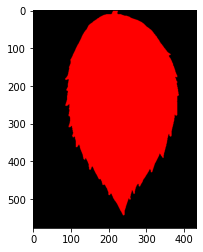

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

orig1 = np.array(Image.open('/content/jpg/1.jpg'))
orig1=cv2.cvtColor(orig1, cv2.COLOR_BGR2RGB)
orig2 = np.array(Image.open('/content/semantic_segmentations/1.png'))

r = np.array(orig2[:, :, 0], dtype=np.int16)#スライス
#retval,r2 = cv2.threshold(r, 0, 255, cv2.THRESH_BINARY)
#r= cv2.blur(r,(6, 6))#ぼかす
#retval,r = cv2.threshold(r, 250, 255, cv2.THRESH_BINARY)#二値化

shape=orig1.shape

kiritori=np.zeros((shape[0],shape[1],4))
for i in list(range(3)):
  kiritori[:,:,i]=orig1[:,:,i]

kiritori[:,:,3]=r
plt.imshow(orig2)
#cv2.imwrite('/content/kiritori.png', kiritori)
#np.savetxt('/content/r.txt',r,fmt='%d')